In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading MNIST dataset
from tensorflow.keras.datasets import mnist
(X_train,y_train) , (X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


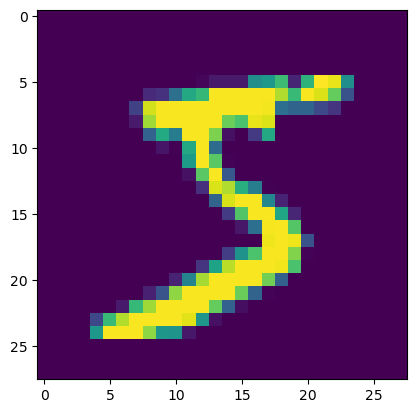

In [4]:
#visualizing the image in train data
plt.imshow(X_train[0])

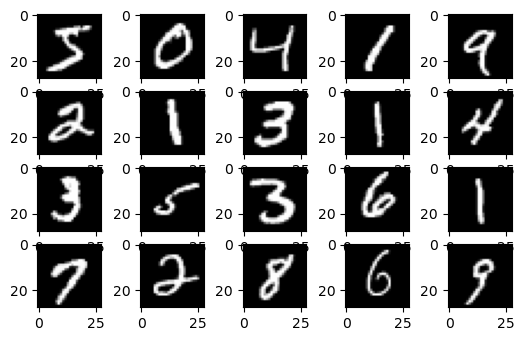

In [5]:
#visualizing the first 20 images in the dataset


for i in range(20):

    #subplot

    plt.subplot(5, 5, i+1)

    # plotting pixel data

    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

# show the figure

plt.show()


In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
# the image is in pixels which ranges from 0 to 255
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
X_train_flat=X_train.reshape(len(X_train),28*28)

X_test_flat=X_test.reshape(len(X_test),28*28)

#checking the shape after flattening

print(X_train_flat.shape)

print(X_test_flat.shape)

(60000, 784)
(10000, 784)


In [9]:
#checking the representation of image after flattening
X_train_flat[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [10]:
#normalizing the pixel values
X_train_flat=X_train_flat/255
X_test_flat=X_test_flat/255

In [11]:
#print this code to check the pixel values after normalization
X_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
#Building a simple ANN model without hidden layer
#importing necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
#Step 1 : Defining the model
model=Sequential()
model.add(Dense(10,input_shape=(784,),activation='softmax'))

In [14]:
#Step 2: Compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
#Step 3: Fitting the model
model.fit(X_train_flat,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 1ms/step - loss: 0.4672 - accuracy: 0.8771
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3038 - accuracy: 0.9149
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2829 - accuracy: 0.9215
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2729 - accuracy: 0.9244
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9262
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2622 - accuracy: 0.9281
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2576 - accuracy: 0.9286
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2554 - accuracy: 0.9300
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2529 - accuracy: 0.9302
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.251

In [16]:
#Step 4: Evaluating the model
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2649 - accuracy: 0.9275


[0.26485878229141235, 0.9275000095367432]

In [17]:
#Step 5 :Making predictions
y_predict = model.predict(X_test_flat)
y_predict[3] #printing the 3rd index

313/313 [==============================] - 0s 964us/step


array([9.9973482e-01, 4.7338401e-12, 1.0224419e-04, 4.2631004e-06,
       4.1612648e-08, 3.3614906e-05, 1.0837601e-04, 4.0541418e-06,
       7.9954025e-06, 4.5889874e-06], dtype=float32)

In [18]:
# Here we get the index of the maximum value in the above-encoded vector. 
np.argmax(y_predict[3])

0

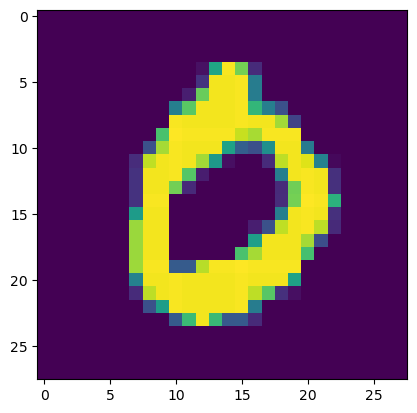

In [19]:
#checking if the predicting is correct
plt.imshow(X_test[3])

<AxesSubplot:>

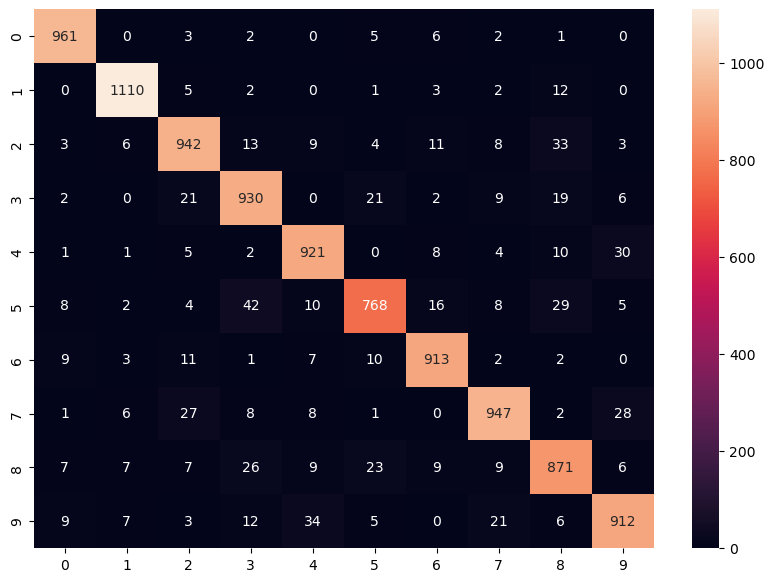

In [20]:
y_predict_labels=np.argmax(y_predict,axis=1)
#Confusion matrix
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_predict_labels)
#visualizaing confusion matrix with heatmap
plt.figure(figsize=(10,7))
sns.heatmap(matrix,annot=True,fmt='d')

In [21]:
model2=Sequential()
#adding first layer with 100 neurons
model2.add(Dense(100,input_shape=(784,),activation='relu'))
#second layer with 64 neurons
model2.add(Dense(64,activation='relu'))
#third layer with 32 neurons
model2.add(Dense(32,activation='relu'))
#output layer
model2.add(Dense(10,activation='softmax'))
#compliling the model
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
model2.fit(X_train_flat,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2561 - accuracy: 0.9254
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1085 - accuracy: 0.9673
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0799 - accuracy: 0.9750
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0632 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0501 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0434 - accuracy: 0.9856
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0381 - accuracy: 0.9879
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0319 - accuracy: 0.9898
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0281 - accuracy: 0.9908
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.025

In [ ]:
#evaluating the model
model2.evaluate(X_test_flat,y_test)